Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friend's initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

# load csv file
netflix_df = pd.read_csv('netflix_data.csv')
# print(netflix_df.head(3))

# check type values
# print('Netflix data types:')
print(netflix_df['type'].value_counts())

type
Movie      5377
TV Show    2410
Name: count, dtype: int64


In [2]:
# filter data 

# keep movies only
mask = netflix_df['type'] == 'TV Show'
netflix_subset = netflix_df[~mask]

# keep certain columns only
columns = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies = netflix_subset[columns]

# keep short movies only
short_duration = netflix_movies['duration'] < 60
short_movies = netflix_movies[short_duration]


In [3]:

# inspect short movies data
print(short_movies.info())

print(short_movies['country'].value_counts())
print(short_movies['genre'].value_counts())
print(short_movies['release_year'].value_counts())
print(short_movies['duration'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 35 to 7784
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         420 non-null    object
 1   country       354 non-null    object
 2   genre         420 non-null    object
 3   release_year  420 non-null    int64 
 4   duration      420 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 19.7+ KB
None
country
United States     219
United Kingdom     45
Canada             22
Mexico             12
Japan               9
India               8
France              7
Germany             3
Australia           3
Brazil              3
Ireland             2
Spain               2
Netherlands         2
Italy               2
Argentina           2
Georgia             1
South Africa        1
Pakistan            1
Colombia            1
Israel              1
Sweden              1
Iceland             1
Denmark             1
Poland              1
Norway       

In short movies DataFrame, we have the following observations:
1.  Most movies are created by the United States, the UK, and Canada (English-speaking countries), and the United States is in a dominating position.
2. The genres of these movies are mostly in Documentaries, Children and Stand-Up.
3. Most of them are released after 2012, and the number is increasing every year!

In [5]:
# inspect data

# check genre types
print(netflix_movies['genre'].value_counts())

# assign colors 
colors = []

for i in range(len(netflix_movies)):
    if netflix_movies.iloc[i, 2] == 'Documentaries':
        colors.append('Red')
    elif netflix_movies.iloc[i, 2] == 'Children':
        colors.append('Green')
    elif netflix_movies.iloc[i, 2] == 'Stand-Up':
        colors.append('Blue')
    else:
        colors.append('Black')

# print(colors)        

genre
Dramas                  1384
Comedies                1074
Documentaries            751
Action                   721
Children                 502
Stand-Up                 321
Horror Movies            244
International Movies     114
Classic Movies            77
Uncategorized             56
Thrillers                 49
Independent Movies        20
Anime Features            19
Music                     17
Cult Movies               12
Sci-Fi                    11
Romantic Movies            3
Sports Movies              1
LGBTQ Movies               1
Name: count, dtype: int64
['Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Red', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Red', 'Black', 'Red', 'Red', 'Black', 'Black', 'Black', 'Black', 'Red', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Black', 'Red', 'Black', 'Black', 'Red', 'Black', 'Black', 'Black'

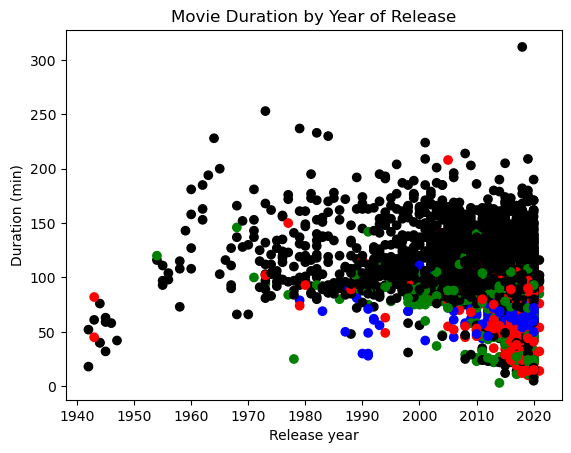

In [7]:
# plot of movie duration over time

fig = plt.scatter(x='release_year', y='duration', data=netflix_movies, c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

Plot observation:
As we discussed in short movies DataFrame, the three genres in short movies are contributing factors for the growth of short movies. However, we can still see a lot of black dots in the second half. Thus, the conclusion is still not clear.

In [ ]:
# final conclusion
answer = "maybe"